# Convolutional Neural Network.
## Instructions and Requirements:
This week workshop will have two sections:

*   Section: 1
  *   In this section, we will implement and observe the operations of various layers used to build the CNN.
  *   By the end of the workshop, we expect you to be able to:
      1.   Explain the Convolution operation
      2.   Explain the pooling operation
      3.   Get familiar with various hyperparameters i.e. stride, padding

*   Section: 2
  *   In this section we will compile all the learning from section 1 to build a basic Convolutional Neural Network using Keras and Tensorflow.
  

##Convolution Summary:

We convolve (slide) a small matrix also known as Filter/kernel, performing element wise matrix multiplications to produce filter-map.

  *   Objective of a convolution operations:
        1.   Apply a set of weights-a filter- to extract local features.
        2.   Use Multiple filters to extract different features.
        3.   Spatially share parameters of each filter.

Mathematically it perform following:
$$ conv(I,K)_{xy} = ∑_{i=1}^{h}\sum_{j=1}^{w}K_{ij}.I_{x+i-1,y+j-1} \tag{1} $$

Where:
- $I$ input image matrix..
-$K$ kernel/Filter used to perform convolution.

Hyper-parameters in Convolution Operations:
*   Number of Filters(K)
*   Size of Filters(F)
*   Stride(S)
*   amount of zero padding(P)

Output Dimensions is given by:

\begin{align}
\mathbf{O}  = \frac{W_{in} -f + 2p}{s} + 1 \tag{2}
\end{align}

### Exercise-1.

Perform following Convolution Operations:

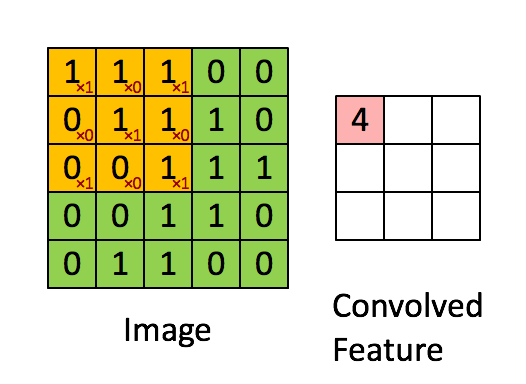

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [6]:
# Defining the input matrix as above using np.array function.
I = np.array([[1, 1, 1, 0, 0], [0, 1, 1, 1 ,0], [0, 0, 1, 1, 1,], [0, 0, 1, 1, 0], [0, 1, 1, 0, 0]])

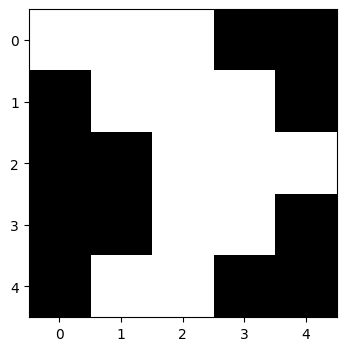

In [7]:
# Visualizing the input.
plt.imshow(I)

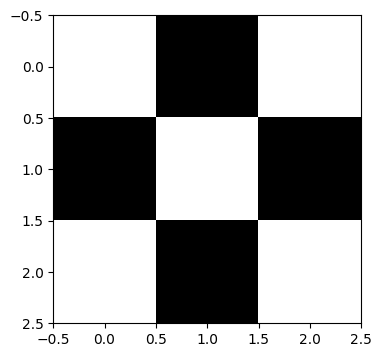

In [8]:
# Defining the input matrix as above using np.matrix function.
K = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
# Visualizing the Filter.
plt.imshow(K)


In [9]:
def convolution(img, filter):
  """
  Function performs convolution operations.
  Arguments:
  Inputs Arguments:
  img(nd array): numpy array of an input image.
  filter(nd array): numpy array of an input filter.
  Output Argumets:
  Filter_Map of Dimesions specified by eq(2).
  """
  output_dimension = # Your Code Here.
  filter_map = np.zeros(shape=(output_dimension, output_dimension))
  # Write a code for Convolution operation between input matrix img and Filter matrix filter

  return filter_map


SyntaxError: invalid syntax (<ipython-input-9-86589a8e420e>, line 11)

In [ ]:
img = convolution(I, K)

In [ ]:
assert img.shape == (3, 3), " Convolution Operation did not produce correct output"

In [ ]:
plt.imshow(img)
print("Test Passed")

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import zipfile
import os

dataset_path = "/content/drive/MyDrive/FruitinAmazon.zip"
extract_path = "/content/"
# Extract the zip file
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify the extraction
os.listdir(extract_path)

['.config', 'drive', 'FruitinAmazon', 'sample_data']

# Section-2: In this section we will build very basic CNN architecture, Compile and train our CNN model.

This will be further divided into following sections:


## Section-2.1: Data Pre-processing.

Expected structure of folder:

-/Datasets/

      --train/
        -- acai/....     
        -- cupuacu/---
        -- all the classes--

In [279]:
train_dir = "/content/FruitinAmazon/train"

In [280]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [281]:
# Hyper-parameters:
batch_size = 16
img_height = 180
img_width = 180

### Load the Data:

We will use tf.keras.utility to load the image, for this function to work, your data should be in the structure suggested above.

We will do this for both training and validation dataset.

### Exercise:

1. To train a deep learning model we need to create a data pipeline, Multiple different approaches are available within keras framework;
one such framework is
  "tf.keras.utils.image_dataset_from_directory("parameter")

Implement above framework and explain the parameters you have used in the comment.

In [282]:
validation_split = 0.2 # 80% training, 20% validation

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
labels='inferred',
label_mode='int',
image_size=(img_height, img_width),
interpolation='nearest',
batch_size=batch_size,
shuffle=True,
validation_split=validation_split,
subset='training',
seed=123
)

Found 90 files belonging to 6 classes.
Using 72 files for training.


In [283]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
labels='inferred',
label_mode='int',
image_size=(img_height, img_width),
interpolation='nearest',
batch_size=batch_size,
shuffle=False,
validation_split=validation_split,
subset='validation',
seed=123
)

Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [284]:
# Printing out number of Classes
class_names = train_ds.class_names
print(class_names)

['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


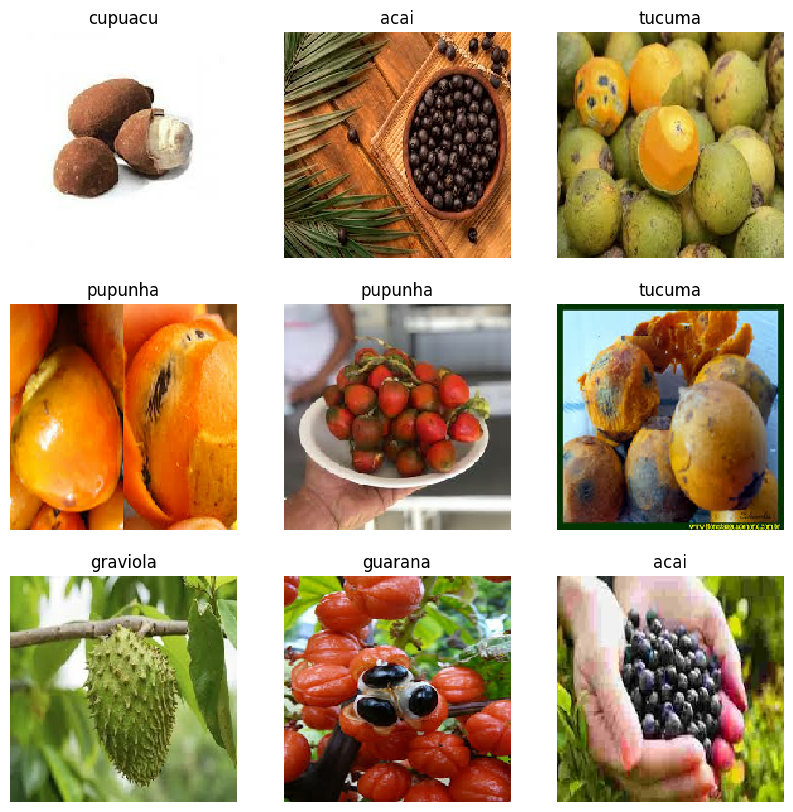

In [285]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# Takes a batch of images
for images, labels in train_ds.take(1):

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [286]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 180, 180, 3)
(16,)


## Design CNN Architecture:

For this task, we will build a CNN with following layers:

Feature-Extraction and Convolution Operations.
1.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
2.   Pooling layer[max, F=(2,2), S=2].
3.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
4.   Pooling layer[max, F=(2,2), S=2].

Classification-Assigning a class probabilities to each classes.
1.   Flatten Layer()
2.   Hidden/Dense Layer [number of neurons=128].
3.   Output Layer [number of neurons=num_classes].


### Exercise:

Please fill the hyper-parameters as defined above in the below layers.

In [287]:
def generate_model(image_height, image_width, nchannels, num_classes):
  """
  This function will generate a model with set of hyperparameters defined above.
  Input Args:
  image_height[int] = Height of an image.
  image_width[int] = Width of an image.
  nchannels[int] = Number of channels in image.
  num_classes[int] = Number of classes in dataset.
  Output Args:
  model-> A CNN model.
  """
  # .Sequential as the flow works from layers to layers.
  model = tf.keras.Sequential([
      # (Normalization) Rescaling and input layer, [For keras the input shape must be(image height, image width, channels)]
      layers.Rescaling(1./255, input_shape=(image_height,image_width,nchannels)),
      # First Block of Convolution and Pooling Operations.
      layers.Conv2D(32,
        kernel_size=(3,3),
        strides=(1),
        padding="same",
        activation="leaky_relu",
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros"),
      layers.MaxPooling2D(pool_size=(2,2), strides=2),
      # Second Block of Convolution and Pooling Operations.
      layers.Conv2D(32,
        kernel_size=(3,3),
        strides=(1),
        padding="same",
        activation="leaky_relu",
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros"),
      layers.MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"),
      # Fully connected classifier.
      layers.Flatten(),
      layers.Dense(64, activation="leaky_relu"),
      layers.Dense(128, activation="leaky_relu"),
      layers.Dense(num_classes, activation="softmax")
  ])
  return model

img_height = 180
img_width = 180

In [288]:
num_classes = len(class_names)
model = generate_model(img_height, img_width, 3, num_classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [289]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_15 (Rescaling)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 90, 90, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 64800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │       4,147,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,166,502 (15.89 MB)

 Trainable params: 4,166,502 (15.89 MB)

 Non-trainable params: 0 (0.00 B)

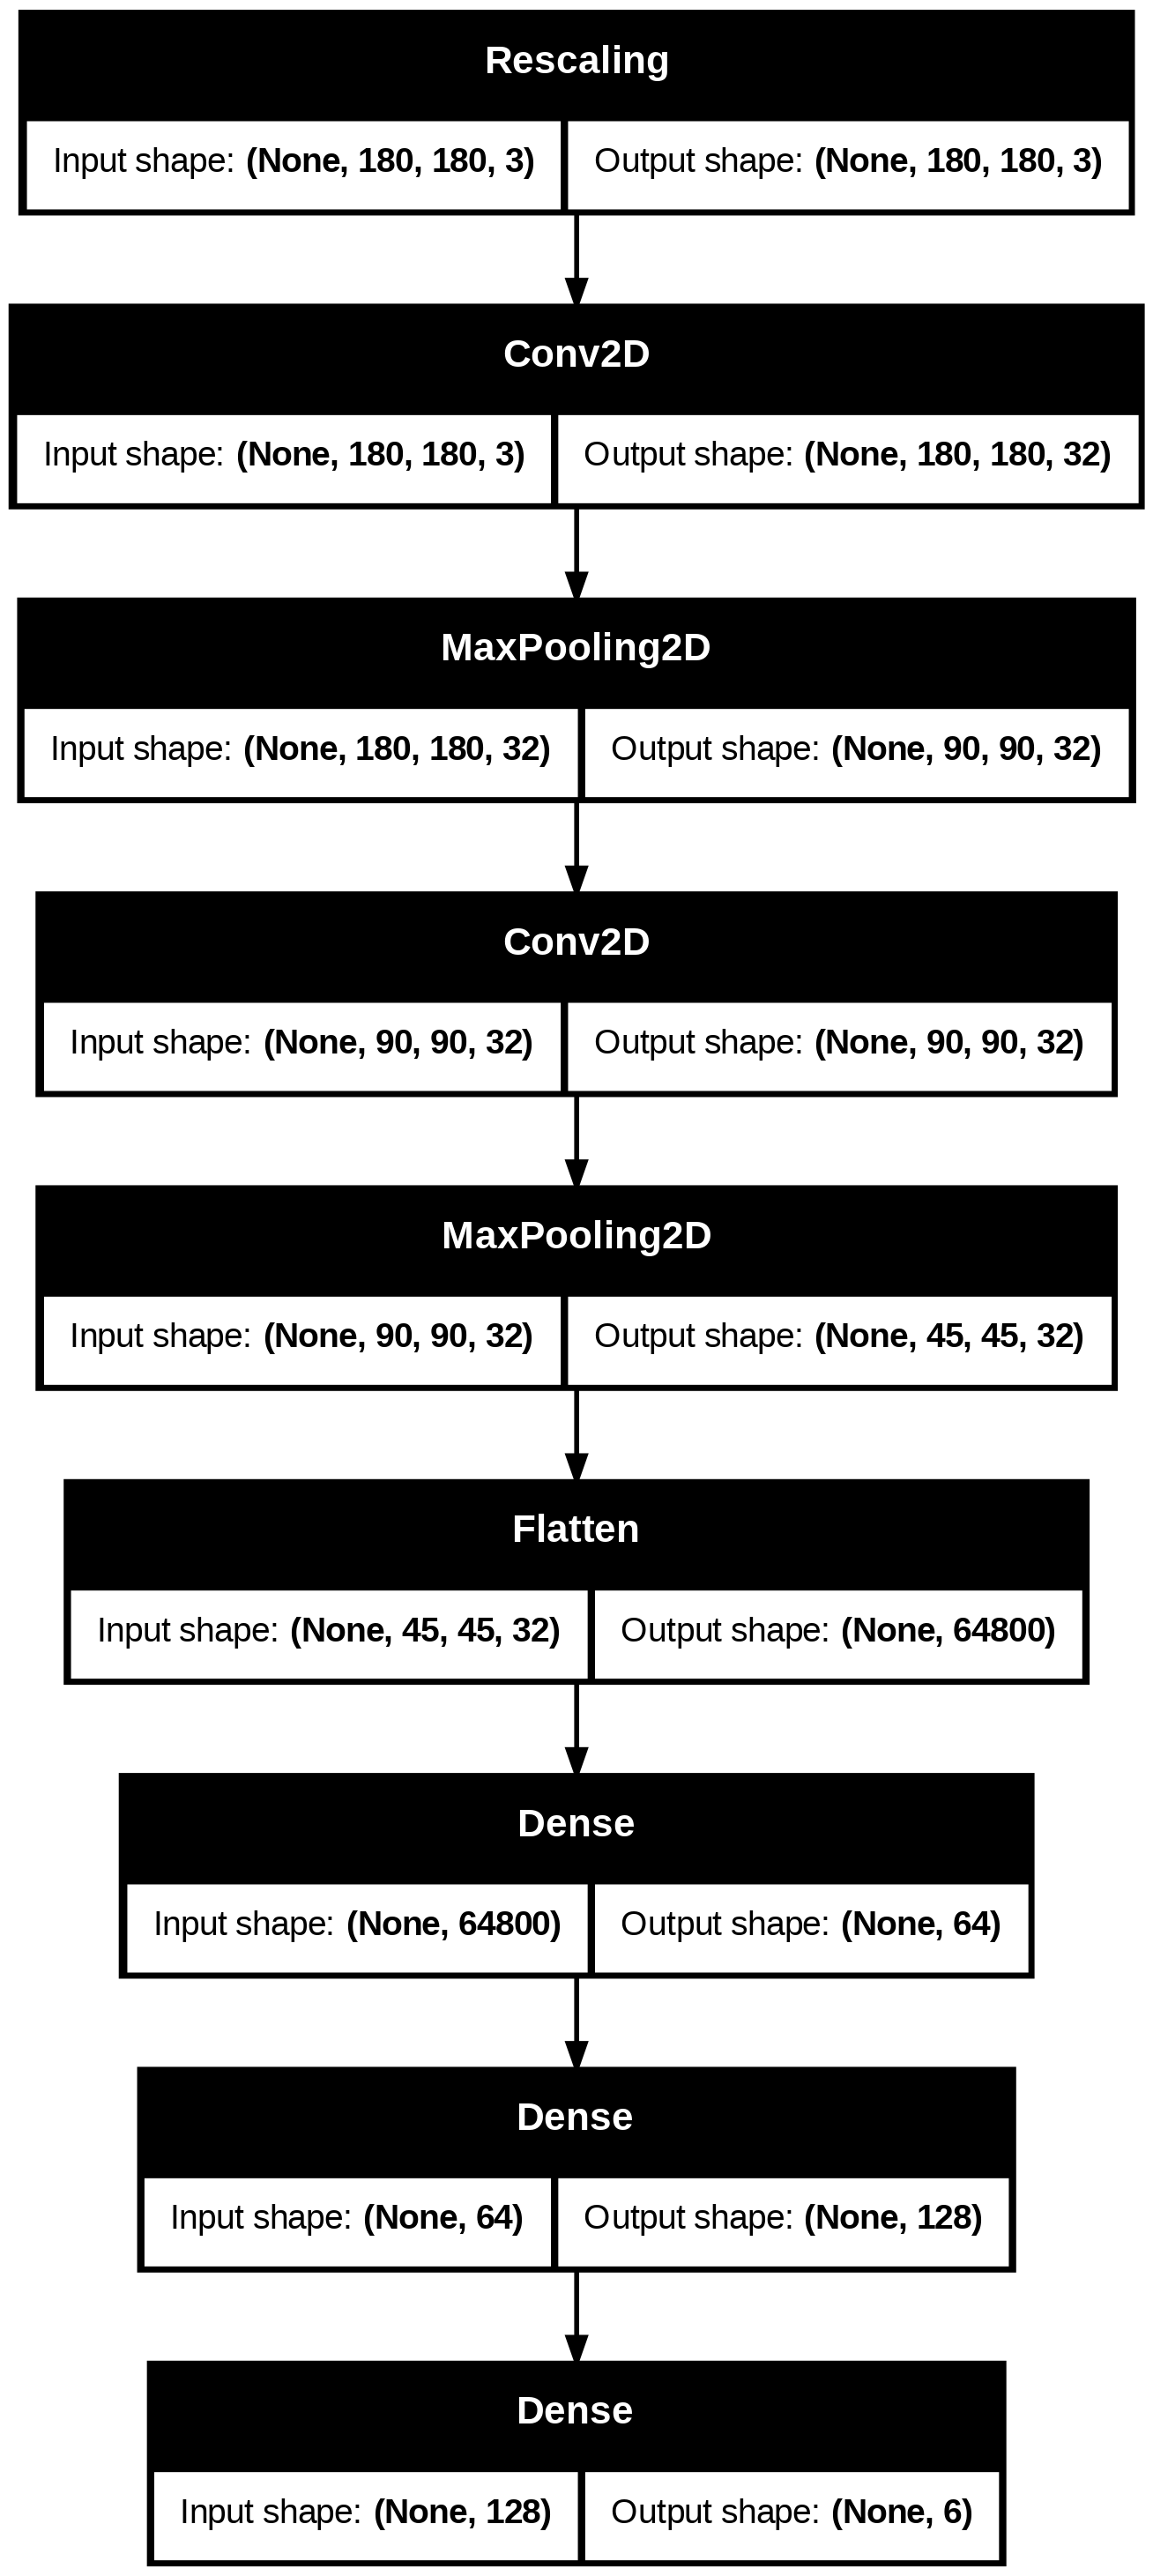

In [290]:
keras.utils.plot_model(model, show_shapes=True)

## Compile and Train Model.

Once we built the model, we need to compile the model before we start training.

In Model compilation, we do the following:
*   Checks for format Error.
*   Defines the loss function.
*   Defines the optimizer.
*   Defines the learning rate.
*   Defines the metrics we will be using.

For training our model we will be using:
*   loss --> SparseCategoricalCrossEntropy.
*   Optimizer --> Adam.
*   Evaluation Metric --> Accuracy.


In [291]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("best_model.h5",
                             monitor="val_loss",
                             save_best_only=True,
                             mode="min",
                             verbose=1)

In [292]:
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

In [293]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Train the Model.

For training a model with all the given hyper-parameters, and argumets we invoke fit methods.

It is a standard practise to return and hold record of losses values and metric values during training in variablel-history.

In [294]:
epochs=250
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[checkpoint]
)

Epoch 1/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.1656 - loss: 3.8560
Epoch 1: val_loss improved from inf to 1.75806, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 436ms/step - accuracy: 0.1727 - loss: 3.8961 - val_accuracy: 0.0556 - val_loss: 1.7581
Epoch 2/250
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3815 - loss: 1.4812
Epoch 2: val_loss did not improve from 1.75806
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4071 - loss: 1.4881 - val_accuracy: 0.1667 - val_loss: 2.3263
Epoch 3/250
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5026 - loss: 1.2684 
Epoch 3: val_loss improved from 1.75806 to 1.12811, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5249 - loss: 1.2284 - val_accuracy: 0.5556 - val_loss: 1.1281
Epoch 4/250
3/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8125 - loss: 0.7918
Epoch 4: val_loss improved from 1.12811 to 0.85886, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.7911 - loss: 0.7860 - val_accuracy: 0.7222 - val_loss: 0.8589
Epoch 5/250
3/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8333 - loss: 0.6229
Epoch 5: val_loss improved from 0.85886 to 0.79934, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8180 - loss: 0.6203 - val_accuracy: 0.6667 - val_loss: 0.7993
Epoch 6/250
3/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9618 - loss: 0.2306 
Epoch 6: val_loss improved from 0.79934 to 0.48911, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9230 - loss: 0.3021 - val_accuracy: 0.7778 - val_loss: 0.4891
Epoch 7/250
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9505 - loss: 0.1748
Epoch 7: val_loss improved from 0.48911 to 0.30649, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9485 - loss: 0.1856 - val_accuracy: 0.8889 - val_loss: 0.3065
Epoch 8/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0973
Epoch 8: val_loss did not improve from 0.30649
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.0963 - val_accuracy: 0.8333 - val_loss: 0.4802
Epoch 9/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0472
Epoch 9: val_loss did not improve from 0.30649
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.0474 - val_accuracy: 0.8333 - val_loss: 0.5306
Epoch 10/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0295
Epoch 10: val_loss did not improve from 0.30649
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0283 - val_accuracy: 0.8333 - val_loss: 0.4295
Epoch 11/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0100 
Epoch 11: val_loss did not improve from 0.30649
5/5 ━━━━━━━━━━━

## Observe the Model Performance.


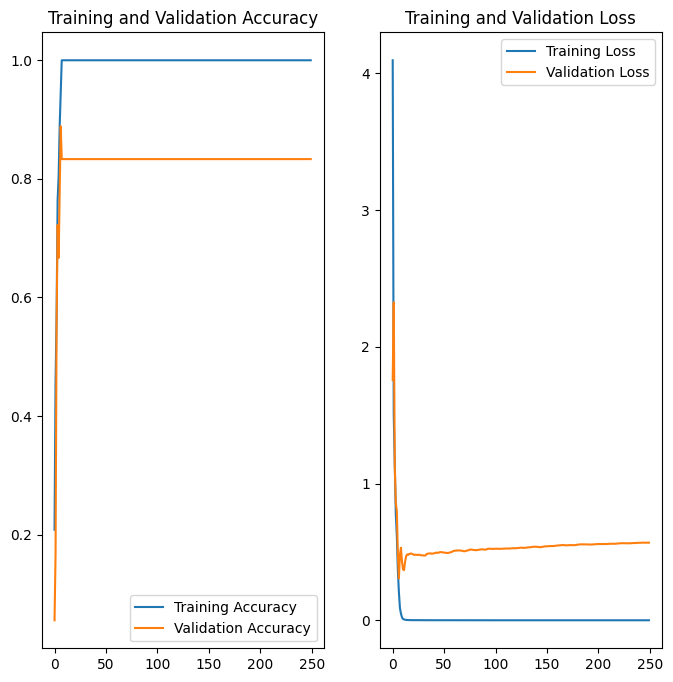

In [295]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Home Task:

Create a Test Set and Perform a model evaluation to find the test accuracy.

Based on last week built a function which predicts input examples, and also plot the result.


In [306]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
"/content/FruitinAmazon/test",
labels='inferred',
label_mode='int',
image_size=(img_height, img_width),
interpolation='nearest',
batch_size=batch_size,
shuffle=True,
seed=123
)

Found 30 files belonging to 6 classes.


In [307]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step - accuracy: 0.7597 - loss: 1.0348
Test Loss: 1.1792
Test Accuracy: 0.7333


In [315]:
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
for i in predicted_labels:
  print(class_names[predicted_labels[i]])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
acai
guarana
acai
guarana
pupunha
guarana
acai
tucuma
pupunha
guarana
acai
tucuma
acai
acai
acai
acai
guarana
acai
acai
acai
acai
guarana
acai
pupunha
tucuma
pupunha
acai
guarana
acai
tucuma


In [333]:
# from sklearn.metrics import classification_report
# report = classification_report(test_data.class_names, predicted_labels)